In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Screentime - App Details.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
plt.figure(figsize=(10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

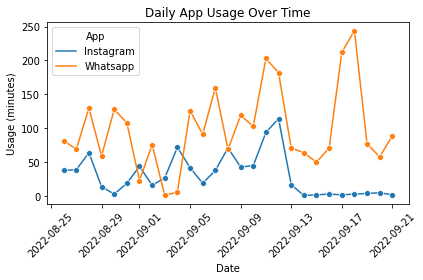

In [5]:
# 1. Usage over time
sns.lineplot(data=df, x='Date', y='Usage', hue='App', marker='o')
plt.title('Daily App Usage Over Time')
plt.ylabel('Usage (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

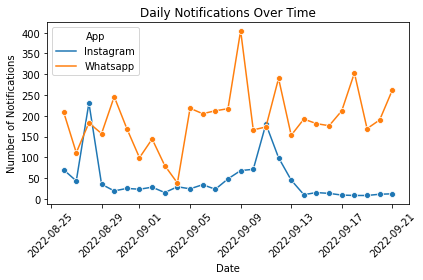

In [6]:
# 2. Notifications over time
sns.lineplot(data=df, x='Date', y='Notifications', hue='App', marker='o')
plt.title('Daily Notifications Over Time')
plt.ylabel('Number of Notifications')
plt.xticks(rotation=45)
plt.tight_layout()

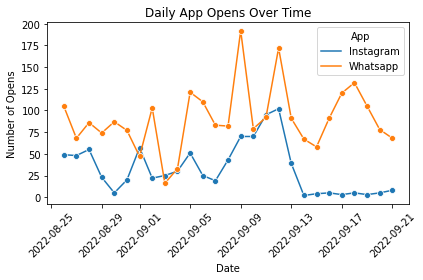

In [7]:
# 3. Times Opened over time
sns.lineplot(data=df, x='Date', y='Times opened', hue='App', marker='o')
plt.title('Daily App Opens Over Time')
plt.ylabel('Number of Opens')
plt.xticks(rotation=45)
plt.tight_layout()

In [8]:
# App-wise Summary
app_summary = df.groupby('App').agg({
    'Usage': ['mean', 'max', 'min'],
    'Notifications': ['mean', 'max', 'min'],
    'Times opened': ['mean', 'max', 'min']
}).round(2)

print("App-wise Summary:\n", app_summary)

App-wise Summary:
            Usage          Notifications          Times opened         
            mean  max min          mean  max min         mean  max min
App                                                                   
Instagram  31.15  114   1         44.30  231   8        32.70  102   2
Whatsapp   98.93  244   1        191.11  405  38        90.26  192  16


In [9]:
# Correlation Matrix
correlation = df[['Usage', 'Notifications', 'Times opened']].corr()
print("\nCorrelation Matrix:\n", correlation)


Correlation Matrix:
                   Usage  Notifications  Times opened
Usage          1.000000       0.774452      0.816409
Notifications  0.774452       1.000000      0.882983
Times opened   0.816409       0.882983      1.000000


In [10]:
# Busiest and Quietest Days
daily_summary = df.groupby('Date').agg({
    'Usage': 'sum',
    'Notifications': 'sum',
    'Times opened': 'sum'
}).sort_values(by='Usage', ascending=False)

busiest_day = daily_summary.head(1)
quietest_day = daily_summary.tail(1)

print("\n Busiest Day:\n", busiest_day)
print("\n Quietest Day:\n", quietest_day)


 Busiest Day:
             Usage  Notifications  Times opened
Date                                          
2022-09-11    297            353           187

 Quietest Day:
             Usage  Notifications  Times opened
Date                                          
2022-09-03     28             95            41


In [11]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [12]:
df['Weekday'] = df['Date'].dt.day_name()
weekday_summary = df.groupby(['Weekday', 'App']).agg({
    'Usage': 'mean',
    'Notifications': 'mean',
    'Times opened': 'mean'
}).reset_index()

In [13]:
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_summary['Weekday'] = pd.Categorical(weekday_summary['Weekday'], categories=ordered_days, ordered=True)
weekday_summary = weekday_summary.sort_values('Weekday')


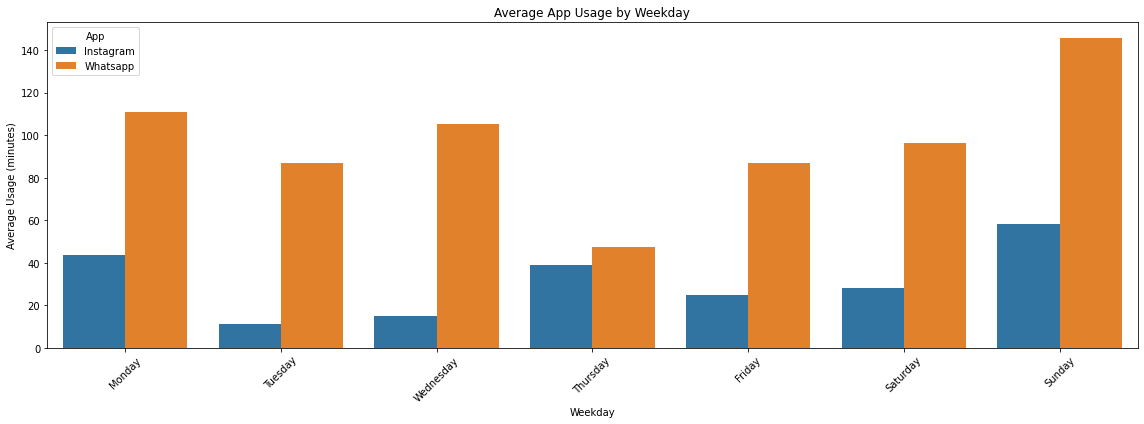

In [14]:
plt.figure(figsize=(16, 6))
sns.barplot(data=weekday_summary, x='Weekday', y='Usage', hue='App')
plt.title('Average App Usage by Weekday')
plt.ylabel('Average Usage (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

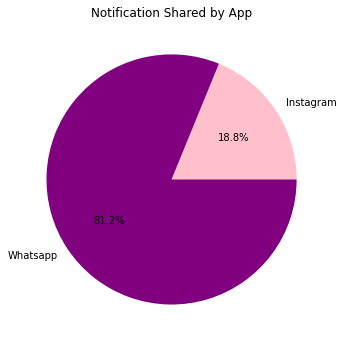

In [19]:
notif_sum = df.groupby('App')['Notifications'].sum()
plt.figure(figsize=(5, 8))
plt.pie(notif_sum, labels=notif_sum.index, autopct='%.1f%%',colors=('pink','purple'))
plt.title("Notification Shared by App")
plt.tight_layout()
plt.show()